In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from DDPG import DDPGagent
from Noise import OUNoise

In [2]:
env = gym.make("Pendulum-v0")

agent = DDPGagent(env.action_space.shape[0], env.observation_space.shape[0])
noise = OUNoise(env.action_space.shape[0])
batch_size = 128
rewards = []
avg_rewards = []

C:\Users\kipst\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\kipst\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


episode: 0, reward: -1565.05, average _reward: nan 

episode: 1, reward: -1283.69, average _reward: -1565.052845039658 

episode: 2, reward: -1654.39, average _reward: -1424.369877603011 

episode: 3, reward: -1602.34, average _reward: -1501.044426788156 

episode: 4, reward: -1649.67, average _reward: -1526.3683540966726 

episode: 5, reward: -1503.29, average _reward: -1551.0285770930936 

episode: 6, reward: -1643.53, average _reward: -1543.072585631304 

episode: 7, reward: -1505.2, average _reward: -1557.4238854229714 

episode: 8, reward: -1569.84, average _reward: -1550.896434360381 

episode: 9, reward: -1555.96, average _reward: -1553.0012296491434 

episode: 10, reward: -1634.82, average _reward: -1553.297402388886 

episode: 11, reward: -1638.43, average _reward: -1560.2741688734363 

episode: 12, reward: -1526.57, average _reward: -1595.7484454067012 

episode: 13, reward: -1604.78, average _reward: -1582.9662347251624 

episode: 14, reward: -1645.77, average _reward: -1583

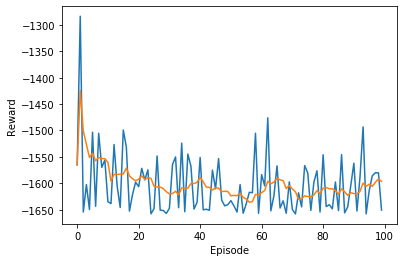

In [3]:
for episode in range(100):
    state = env.reset()
    noise.reset()
    episode_reward = 0
    for step in range(500):
        #env.render()
        action = agent.get_action(state)
        noise_action = noise.apply_noise(action, step)
        
        new_state, reward, done, _ = env.step(noise_action)
        
        agent.memory.push(state, action, reward, new_state, done)
        
        if agent.memory.count() > batch_size:
            agent.update(batch_size)
        
        state = new_state
        episode_reward += reward
        
        if done:
            print("episode: {}, reward: {}, average _reward: {} \n".format(episode, np.round(episode_reward, decimals=2), np.mean(rewards[-10:])))
            break
    
    rewards.append(episode_reward)
    avg_rewards.append(np.mean(rewards[-10:]))

plt.plot(rewards)
plt.plot(avg_rewards)
plt.plot()
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()        

In [7]:
		self.q_gradient_input = tf.placeholder("float",[None,self.action_dim])
		self.parameters_gradients = tf.gradients(self.action_output,self.net,-self.q_gradient_input)
		self.optimizer = tf.train.AdamOptimizer(LEARNING_RATE).apply_gradients(zip(self.parameters_gradients,self.net))

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [35]:
import tensorflow as tf
tau = 0.1
target_param = agent.actor_target.get_weights()
param = agent.actor.get_weights()
for target_layer, layer in zip(target_param, param):
    target_layer = tau * layer + (1.0 - tau) * target_layer
agent.actor_target.set_weights(target_param)

In [54]:
tau = 0.1
target_param = agent.actor_target.get_weights()
param = agent.actor.get_weights()
for layer in range(0, len(target_param)):
    target_param[layer] = tau * param[layer] + (1.0 - tau) * target_param[layer]
agent.actor_target.set_weights(target_param)

In [5]:
agent.critic_target.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 128)          512         input_5[0][0]                    
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 129)          0           dense_7[0][0]                    
                                                                 input_6[0][0]              